In [1]:
"""
Module permean_methane_rev_1_0
by T. van Kessel 
Analysis of Methane emissins in the Permean Basin
"""

'\nModule permean_methane_rev_1_0\nby T. van Kessel \nAnalysis of Methane emissins in the Permean Basin\n'

# Permean Methane Rev 1
This file contains the analysis of the NASA/JPL Methane Emissions 
dataset for the Permean Basin

## Business Questions:
> ### 1. Does the 80/20 rule apply to methane emissions?
> ### 2. Do methane emissions vary significantly by type of equipment?
> ### 3. What fraction of emissions occur in the presence of flaring?

#### note: in the first pass, in the source data, the word 'NA" was interpreted as missing data 
#### - as missing data  I changed it to 'Unknown'

In [2]:
# import packages to support the data curation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Perform initial data load and preliminary look at the data
1. load the datasets
2. view the column headers
3. check the dimensions of the data
4. rename columns to shorter more convenient titles for use

In [3]:
# load NASA-JPL source dataset into pandas dataframe
DATA_FILE_NAME = './Georeferenced source list ez1c00173_si_002_clean_v1.csv'
source_df = pd.read_csv(DATA_FILE_NAME)

# get dataframe basic data
column_headers = source_df.columns.tolist()
print("column headers")
print(column_headers)

num_cols = source_df.shape[1]
print(f"\n number of cols of data {num_cols}")

num_rows = source_df.shape[0]
print(f"\n number of rows of data {num_rows}")

# Change column names to shorter versions for convenience
short_col_names={'Source identifier ' : 'source_id',
    'Source latitude (deg)' : 'lat',
    'Source longitude (deg)' : 'lon',
    'Source type (best estimate)' : 'source_type',
    'IPCC sector' : 'IPCC_sect',
    'Number overflights' : 'num_flights', 
    'Source Persistence (f)' : 'source_pers', 
    'Confidence in persistence ' : 'source_pers_conf', 
    'Qsource (kg/hr): Persistence adjusted average source emissions' : 'q_source', 
    'Sigma Qsource (kg/hr): Uncertainty for persistence adjusted average source emissions':
    'sig_q_source'}

source_df.rename(columns=short_col_names, inplace=True)
source_df.head(5)

column headers
['Source identifier ', 'Source latitude (deg)', 'Source longitude (deg)', 'Source type (best estimate)', 'IPCC sector', 'Number overflights', 'Source Persistence (f)', 'Confidence in persistence ', 'Qsource (kg/hr): Persistence adjusted average source emissions', 'Sigma Qsource (kg/hr): Uncertainty for persistence adjusted average source emissions']

 number of cols of data 10

 number of rows of data 1756


,source_id,lat,lon,source_type,IPCC_sect,num_flights,source_pers,source_pers_conf,q_source,sig_q_source
0,P00001,32.212086,-103.697212,tank,1B2 Oil & Natural Gas,12,0.833333,0.968324,865.484230,307.380288
1,P00002,32.199937,-103.673324,tank,1B2 Oil & Natural Gas,12,0.333333,0.968324,207.089504,47.441634
2,P00003,32.116135,-103.626582,tank,1B2 Oil & Natural Gas,12,0.583333,0.968324,305.700650,97.254972
3,P00004,32.322594,-103.816072,pipeline,1B2 Oil & Natural Gas,11,0.090909,0.957765,157.876750,94.129788
4,P00005,32.284279,-103.793918,tank,1B2 Oil & Natural Gas,10,0.200000,0.943686,161.404695,51.069466


In [4]:
# load NASA-JPL plume dataset into pandas dataframe
DATA_FILE_NAME = './Georeferenced plume list ez1c00173_si_001.csv'
plume_df = pd.read_csv(DATA_FILE_NAME)

# get dataframe basic data
column_headers = plume_df.columns.tolist()
print("column headers")
print(column_headers)

num_cols = plume_df.shape[1]
print(f"\nnumber of cols of data {num_cols}")

num_rows = plume_df.shape[0]
print(f"\nnumber of rows of data {num_rows}")

plume_df.head(5)

# Change column names to shorter versions for convenience
short_col_names={'Source identifier ': 'source_id',
    'Plume latitude (deg)' : 'lat',
    'Plume longitude (deg)' : 'lon',
    'Candidate identifier' : 'candidate_id',
    'Date of detection' : 'date_detected',
    'Time of detection (UTC)' : 'time_detected',
    'Qplume (kg/hr): Plume emissions':'q_plume',
    'Sigma Qplume (kg/hr): Uncertainty for plume emissions':'sig_q_plume',
    'Active flare detected?': 'active_flare',
    'Inactive flare detected?' : 'inactive_flare'}

plume_df.rename(columns=short_col_names, inplace=True)
plume_df.head()

column headers
['Source identifier ', 'Plume latitude (deg)', 'Plume longitude (deg)', 'Candidate identifier', 'Date of detection', 'Time of detection (UTC)', 'Qplume (kg/hr): Plume emissions', 'Sigma Qplume (kg/hr): Uncertainty for plume emissions', 'Active flare detected?', 'Inactive flare detected?']

number of cols of data 10

number of rows of data 3067


,source_id,lat,lon,candidate_id,date_detected,time_detected,q_plume,sig_q_plume,active_flare,inactive_flare
0,P00001,32.212063,-103.697076,ang20190922t192642-2,9/22/2019,19:26:42,2579.528100,902.732655,False,False
1,P00002,32.200072,-103.673301,ang20190922t192642-4,9/22/2019,19:26:42,420.725207,147.155782,False,False
2,P00003,32.116008,-103.626345,ang20190922t192642-5,9/22/2019,19:26:42,1051.909600,339.267587,False,False
3,P00004,32.322594,-103.816072,ang20190922t194340-1,9/22/2019,19:43:40,1736.644250,1035.427670,False,False
4,P00005,32.284083,-103.793989,ang20190922t194340-2,9/22/2019,19:43:40,870.605019,435.968147,False,False


# Check data integity

    1. heck that each column is a variable and each row is an individual
    2. Look at the number of rows and columns in the dataset
    3. Check if there are missing values in any rows or columns
    4. Check if any columns are of different data types than expected
    5. Build exploratory plots (this will be done in the following section)


### 1. check for unique rows:

In [5]:
# Check that each column is a variable and each row is an individual

source_df_rows_unique = not plume_df.duplicated().any()
print(f"source_df rows are unique: {source_df_rows_unique}")
plume_df_rows_unique = not plume_df.duplicated().any()
print(f"plume_df rows are unique: {plume_df_rows_unique}")

source_df rows are unique: True
plume_df rows are unique: True


### 2. check data dimensions:

In [6]:
# Look at the number of rows and columns in the dataset
num_cols = source_df.shape[1]
print(f"\n source_df number of cols of data {num_cols}")

num_rows = source_df.shape[0]
print(f"\n source_df number of rows of data {num_rows}")

num_cols = plume_df.shape[1]
print(f"\n plume_df number of cols of data {num_cols}")

num_rows = plume_df.shape[0]
print(f"\n plume_df number of rows of data {num_rows}")


 source_df number of cols of data 10

 source_df number of rows of data 1756

 plume_df number of cols of data 10

 plume_df number of rows of data 3067


### 3. check for missing data:

In [7]:
# Check if there are missing values in any rows or columns
# note: in the first pass, the word 'NA" was treated as missing data
# - I changed it to 'Unknown'

# Check if any column has missing data
has_missing_data = source_df.isna().any()

# 'has_missing_data' will be a Series with True/False values for each column
print("source_df missing data by column\n", has_missing_data)

# Check if any column has missing data
has_missing_data = plume_df.isna().any()

# 'has_missing_data' will be a Series with True/False values for each column
print("\nplume_df missing data by column\n", has_missing_data)

source_df missing data by column
 source_id           False
lat                 False
lon                 False
source_type         False
IPCC_sect           False
num_flights         False
source_pers         False
source_pers_conf    False
q_source            False
sig_q_source        False
dtype: bool

plume_df missing data by column
 source_id         False
lat               False
lon               False
candidate_id      False
date_detected     False
time_detected     False
q_plume           False
sig_q_plume       False
active_flare      False
inactive_flare    False
dtype: bool


### confirm no missing source data:
note: in the first pass, in the source data, the word 'NA" was interpreted
as missing data - I changed it to 'Unknown'

In [8]:
# Create a boolean mask to identify rows with missing data in the specified column
mask = source_df["source_type"].isna()

# Use the 'index' attribute to get the row numbers where the mask is True
# (i.e., missing data)
rows_with_missing_data = source_df.index[mask].tolist()

# 'rows_with_missing_data' will be a list of row numbers
# where the specified column has missing data
print(rows_with_missing_data)

# note: the answer we want is an empty array

[]


### 4. check for mixed data type in each column:

In [9]:
# Check if any columns are of different data types than expected

# first assign the type to each column - note this will fail if data doesn't conform
desired_data_types = [str, float, float, str, str, int, float, float, float, float]

# Iterate through the list of columns and their corresponding types
for column_name, data_type in zip(source_df.columns, desired_data_types):
    source_df[column_name] = source_df[column_name].astype(data_type)

# Check if the data type for each element in a column is the same
is_element_type_same_for_columns = source_df.applymap(type).nunique() == 1

# 'is_element_type_same_for_columns' will be a Series of True/False values for each column
print("is data type the same within each column of source_df: ")
print(is_element_type_same_for_columns)

plume_df.head(10)


is data type the same within each column of source_df: 
source_id           True
lat                 True
lon                 True
source_type         True
IPCC_sect           True
num_flights         True
source_pers         True
source_pers_conf    True
q_source            True
sig_q_source        True
dtype: bool


,source_id,lat,lon,candidate_id,date_detected,time_detected,q_plume,sig_q_plume,active_flare,inactive_flare
0,P00001,32.212063,-103.697076,ang20190922t192642-2,9/22/2019,19:26:42,2579.528100,902.732655,False,False
1,P00002,32.200072,-103.673301,ang20190922t192642-4,9/22/2019,19:26:42,420.725207,147.155782,False,False
2,P00003,32.116008,-103.626345,ang20190922t192642-5,9/22/2019,19:26:42,1051.909600,339.267587,False,False
3,P00004,32.322594,-103.816072,ang20190922t194340-1,9/22/2019,19:43:40,1736.644250,1035.427670,False,False
4,P00005,32.284083,-103.793989,ang20190922t194340-2,9/22/2019,19:43:40,870.605019,435.968147,False,False
5,P00006,32.998623,-102.812262,ang20190922t203229-2,9/22/2019,20:32:29,4437.723110,2268.543720,False,False
6,P00007,32.028022,-103.570745,ang20190923t170747-12,9/23/2019,17:07:47,753.524542,149.873151,False,False
7,P00008,32.322764,-103.814295,ang20190923t170747-3,9/23/2019,17:07:47,2054.539640,467.871150,False,False
8,P00009,32.273385,-103.798210,ang20190923t170747-4,9/23/2019,17:07:47,1365.645170,323.122588,False,False
9,P00010,32.264252,-103.771502,ang20190923t170747-5,9/23/2019,17:07:47,1582.974910,275.998471,False,False


In [10]:
# Check if any columns are of different data types than expected

# first assign the type to each column - note this will fail if data doesn't conform
desired_data_types = [str, float, float, str, str, str, float, float, bool, bool]

# Iterate through the list of columns and their corresponding types
for column_name, data_type in zip(plume_df.columns, desired_data_types):
    plume_df[column_name] = plume_df[column_name].astype(data_type)

# Check if the data type for each element in a column is the same
is_element_type_same_for_columns = plume_df.applymap(type).nunique() == 1

# 'is_element_type_same_for_columns' will be a Series of True/False values for each column
print("is data type the same within each column of plume_df: ")
print(is_element_type_same_for_columns)
plume_df.head(10)

is data type the same within each column of plume_df: 
source_id         True
lat               True
lon               True
candidate_id      True
date_detected     True
time_detected     True
q_plume           True
sig_q_plume       True
active_flare      True
inactive_flare    True
dtype: bool


,source_id,lat,lon,candidate_id,date_detected,time_detected,q_plume,sig_q_plume,active_flare,inactive_flare
0,P00001,32.212063,-103.697076,ang20190922t192642-2,9/22/2019,19:26:42,2579.528100,902.732655,False,False
1,P00002,32.200072,-103.673301,ang20190922t192642-4,9/22/2019,19:26:42,420.725207,147.155782,False,False
2,P00003,32.116008,-103.626345,ang20190922t192642-5,9/22/2019,19:26:42,1051.909600,339.267587,False,False
3,P00004,32.322594,-103.816072,ang20190922t194340-1,9/22/2019,19:43:40,1736.644250,1035.427670,False,False
4,P00005,32.284083,-103.793989,ang20190922t194340-2,9/22/2019,19:43:40,870.605019,435.968147,False,False
5,P00006,32.998623,-102.812262,ang20190922t203229-2,9/22/2019,20:32:29,4437.723110,2268.543720,False,False
6,P00007,32.028022,-103.570745,ang20190923t170747-12,9/23/2019,17:07:47,753.524542,149.873151,False,False
7,P00008,32.322764,-103.814295,ang20190923t170747-3,9/23/2019,17:07:47,2054.539640,467.871150,False,False
8,P00009,32.273385,-103.798210,ang20190923t170747-4,9/23/2019,17:07:47,1365.645170,323.122588,False,False
9,P00010,32.264252,-103.771502,ang20190923t170747-5,9/23/2019,17:07:47,1582.974910,275.998471,False,False


# Make copy of dataset

In [11]:
plume_copy_df = plume_df.copy()
plume_df.to_csv('plume_data_rev1.csv', index=False, header=True)

# Build exploratory plots

## Business question 1. Does the 80/20 rule apply to methane emissions?

We will begin by looking at the magnitude of emissions:

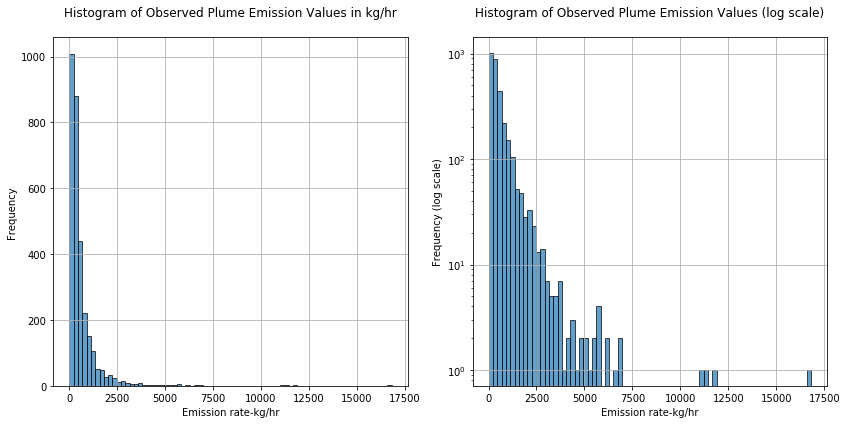

In [12]:
# First we will look at the magnitude of the plume emissions rate in kg/hour
NUM_BINS = 75

# Create a figure and two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram in the first subplot
axs[0].hist(plume_df['q_plume'], bins=NUM_BINS, alpha=0.7, edgecolor='black')
axs[0].set_xlabel('Emission rate-kg/hr')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Histogram of Observed Plume Emission Values in kg/hr\n')
axs[0].grid(True)  # Add a grid to the first subplot

# Plot the second histogram in the second subplot with a log y-axis
axs[1].hist(plume_df['q_plume'], bins=NUM_BINS, alpha=0.7, edgecolor='black')
axs[1].set_yscale('log')
axs[1].set_xlabel('Emission rate-kg/hr')
axs[1].set_ylabel('Frequency (log scale)')
axs[1].set_title('Histogram of Observed Plume Emission Values (log scale)\n')
axs[1].grid(True)  # Add a grid to the second subplot

# Adjust the spacing between subplots to avoid overlapping labels
plt.tight_layout()

# Show the plot
plt.show()

# restore dataframe
plume_df = plume_copy_df.copy()
#plume_df.head(10)

Maximum Cumulative Sum: 1815347.5734446931
cumulative sum threshold: 1452278.0587557545
Index Closest to Cumulative Sum Threshold: 1379
fraction of observations at 80% of total emissions:  0.4496250407564395


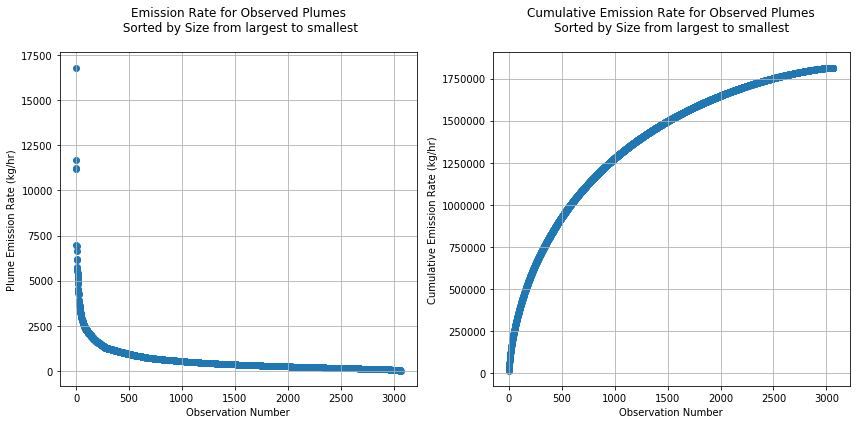

In [13]:
# we will now compute the fraction of emissions that are responsible for 80% of the totol
# Sort plume_df by q_plume
sorted_plume_df = plume_df.sort_values(by=['q_plume'], ascending=False).copy()
sorted_plume_df = sorted_plume_df.reset_index(drop=True)

# Calculate cumulative sum
sorted_plume_df['cumulative_sum'] = sorted_plume_df['q_plume'].cumsum()

# Find the maximum value of cumulative_sum
max_cumsum = sorted_plume_df['cumulative_sum'].max()
print("Maximum Cumulative Sum:", max_cumsum)

# Define the cumulative sum threshold
cumsum_threshold = max_cumsum*0.8
print("cumulative sum threshold:", cumsum_threshold)

# Find the index in sorted_plume_df where the cumulative sum is closest to cumsum_threshold
index_closest_to_threshold = np.abs(
    sorted_plume_df['cumulative_sum'] - cumsum_threshold).idxmin()
print("Index Closest to Cumulative Sum Threshold:", index_closest_to_threshold)

# 80% transition
total_number_observations = len(sorted_plume_df)
plume_number_ratio = float(index_closest_to_threshold/total_number_observations)
print("fraction of observations at 80% of total emissions: ",plume_number_ratio)

# Create a 1x2 grid of subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the sorted q_plume column in the first subplot
axs[0].scatter(sorted_plume_df.index, sorted_plume_df['q_plume'])
axs[0].set_xlabel('Observation Number')
axs[0].set_ylabel('Plume Emission Rate (kg/hr)')
axs[0].set_title(
    'Emission Rate for Observed Plumes\n Sorted by Size from largest to smallest\n')
axs[0].grid(True)  # Add a grid

# Plot the cumulative sum column in the second subplot
axs[1].scatter(sorted_plume_df.index, sorted_plume_df['cumulative_sum'])
axs[1].set_xlabel('Observation Number')
axs[1].set_ylabel('Cumulative Emission Rate (kg/hr)')
TITLE = 'Cumulative Emission Rate for Observed Plumes\n'
TITLE += 'Sorted by Size from largest to smallest\n'
axs[1].set_title(TITLE)
axs[1].grid(True)  # Add a grid

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

# Restore the original dataframe
plume_df = plume_copy_df.copy()

From the calculations above we see that the fraction of observations at 80% of total 
emissions is 0.4496250407564395.

> Put differently, 

> ### the largest 44% of emissions in this data account for 80% of the total emissions. 




## Business question 2. Do methane emissions vary significantly by type of equipment?

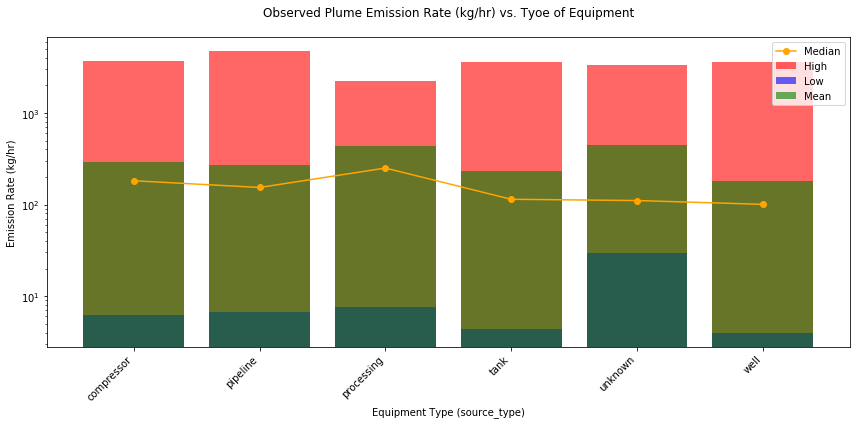

In [14]:
# Calculate summary statistics for 'q_plume' for each 'source_type'
summary_stats = source_df.groupby(
    'source_type')['q_source'].agg(['mean', 'max', 'min', 'median'])

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Plot the candlestick bar chart
plt.bar(summary_stats.index, summary_stats['max'], color='red', label='High', alpha=0.6)
plt.bar(summary_stats.index, summary_stats['min'], color='blue', label='Low', alpha=0.6)
plt.bar(summary_stats.index, summary_stats['mean'], color='green', label='Mean', alpha=0.6)
plt.plot(
    summary_stats.index, summary_stats['median'],
    marker='o', color='orange', label='Median')

# Set the y-axis to log scale
plt.yscale('log')

# Add labels and title to the plot (modify as needed)
plt.xlabel('Equipment Type (source_type)')
plt.ylabel('Emission Rate (kg/hr)')
plt.title('Observed Plume Emission Rate (kg/hr) vs. Tyoe of Equipment\n')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Add a legend to the plot
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

# restore dataframe
plume_df = plume_copy_df.copy()
# plume_df.head(10)


>### The chart above shows that the emissions do not vary significantly 
>### by type of equipment in this dataset


## Business question 3. What fraction of emissions occur in the presence of flaring?

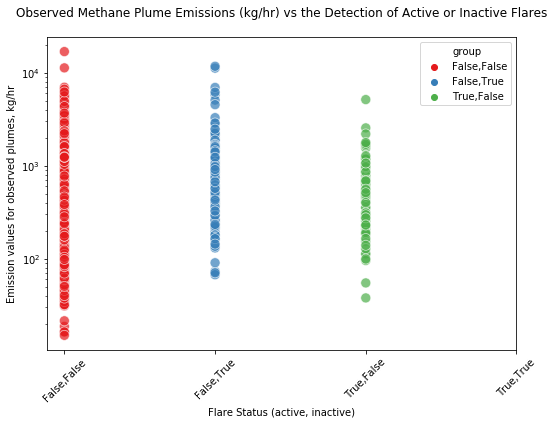

In [15]:
# We will begin by sorting the data according the whether an active flare
# or inactive flare was detected.
# then will then count the number of observations that fall into each of the 4 possible
# categories.
# We note the the 4th category (True,True) can never be logically satisfied
# and serves as a check

# Set the figure size for the plot
plt.figure(figsize=(8, 6))

# Create a new column for grouping based on both active_flare and inactive_flare
plume_df['group'] = plume_df[
    'active_flare'].astype(str) + ',' + plume_df['inactive_flare'].astype(str)

# Set the order of groups for the x-axis
group_order = ['False,False', 'False,True', 'True,False', 'True,True']

# Use Seaborn to create the scatter plot with grouped x-axis
sns.scatterplot(
    data=plume_df, x='group', y='q_plume', hue='group', palette='Set1', s=100, alpha=0.7)

# Set the y-axis to log scale
plt.yscale('log')

# Add labels and title to the plot
plt.xlabel('Flare Status (active, inactive)')
plt.ylabel('Emission values for observed plumes, kg/hr')
TITLE ='Observed Methane Plume Emissions (kg/hr) vs'
TITLE += ' the Detection of Active or Inactive Flares\n'
plt.title(TITLE)

# Set the x-axis tick labels and adjust rotation
plt.xticks(ticks=range(len(group_order)), labels=group_order, rotation=45)

# Remove the legend title
plt.legend(title=None)

# Show the plot
plt.tight_layout()
plt.show()

# restore dataframe
plume_df = plume_copy_df.copy()
# plume_df.head(10)

{'False,False': 2840, 'False,True': 151, 'True,False': 76}


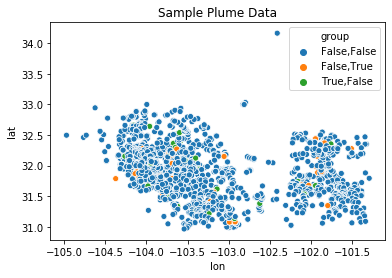

In [16]:
# Lets create a plot showing the geographic distribution of plume observations
# This is redundent since we have already done this with QGIS

# Create group column
plume_df['group'] = plume_df[
    'active_flare'].astype(str) + ',' + plume_df['inactive_flare'].astype(str)

# Get unique groups
groups = plume_df['group'].unique()

# Create dictionary to store counts
group_counts = {}

# Count rows for each group
for group in groups:
    group_df = plume_df[plume_df['group'] == group]
    group_counts[group] = len(group_df)

# Print group counts
print(group_counts)

# Plot code
plt.figure()
sns.scatterplot(data=plume_df, x='lon', y='lat', hue='group')
plt.title('Sample Plume Data')
plt.show()

# restore dataframe
plume_df = plume_copy_df.copy()
# plume_df.head(10)

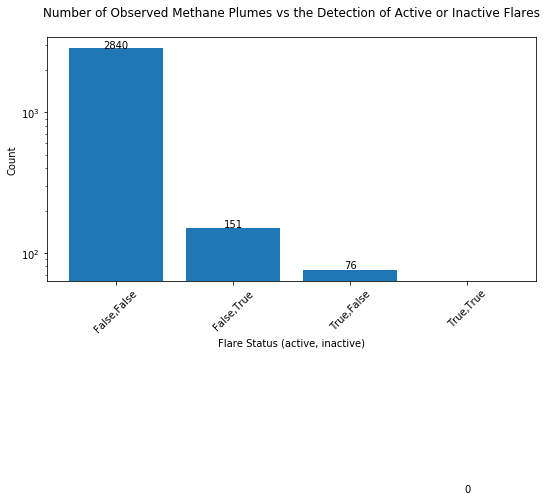

In [17]:
# Make a bar chart to show the number of observed plumes in the 4 detected flare categories

# Set up categories and initialize
_category_counts = {'False,False': 0, 'False,True': 0,
                   'True,False': 0, 'True,True': 0}

# Iterate through rows to count categories
for index, row in plume_df.iterrows():
    CATEGORY = str(row['active_flare']) + ',' + str(row['inactive_flare'])
    _category_counts[CATEGORY] += 1

# Create bar plot
plt.figure(figsize=(8,12))
counts = [_category_counts[cat] for cat in group_order]
plt.bar(group_order, counts)

# Add count labels to bars
for i, count in enumerate(counts):
    plt.text(i, count+2, str(count), ha='center')

plt.yscale('log')
plt.xlabel('Flare Status (active, inactive)')
plt.ylabel('Count')
TITLE ='Number of Observed Methane Plumes vs'
TITLE += ' the Detection of Active or Inactive Flares\n'
plt.title(TITLE)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# restore dataframe
plume_df = plume_copy_df.copy()
# plume_df.head(10)

>### We conclude:
>>### 1. the vast majority of observed plumes occur in the absence of any observed flares 
>>### (active or inactive).
>>### 2. the number of plumes present when active flaring is observed is non-trivial. 
>>### 3. active flaring accounts for about 5% of the observed emissions in this dataset.